In [1]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [2]:
print(os.getcwd())

C:\Users\Manshi\Desktop\combine Razorpay


In [3]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('p.csv')]
csv_files

['April 23 p.csv',
 'Aug 22 p.csv',
 'dec 22 p.csv',
 'feb 23 p.csv',
 'Jan 23 p.csv',
 'july 22 p.csv',
 'june 23 p.csv',
 'march 23 p.csv',
 'may 23 p.csv',
 'Nov 22 p.csv',
 'oct 22 p.csv',
 'sept 22 p.csv']

In [4]:
combined_data = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    combined_data = pd.concat([combined_data,data],ignore_index=True)

In [5]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('orders.csv')]
csv_files

['april 2023 orders.csv',
 'aug 22 orders.csv',
 'dec 2022 orders.csv',
 'feb 2023 orders.csv',
 'jan 23 orders.csv',
 'july 22 orders.csv',
 'june 23 orders.csv',
 'march 2023 orders.csv',
 'May 2023 orders.csv',
 'Nov 2022 orders.csv',
 'oct 2022 orders.csv',
 'sept 2022 orders.csv']

In [6]:
orders = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    orders = pd.concat([orders,data],ignore_index=True)

In [7]:
# df=pd.read_csv('may 2023.csv')
# orders=pd.read_csv('May orders 2023.csv')

In [8]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [9]:
combined_data

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...
6338,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6339,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6340,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,pay_KMsK0vVFivSewT
6341,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,pay_KNZvbmKjqIktA4


In [10]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [11]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [12]:
orders

,order_id,name,email
0,order_LYNixREtZ5yK9S,Kanchan,Samtani.kanchan@bcg.com
1,order_LYX61KR1NfQCKT,Sonavi Desai,sonavid@gmail.com
2,order_LYX7VqyBqc61HI,Sonavi Desai,sonavid@gmail.com
3,order_LYXuMMuY5pVnm9,Sonavi Desai,sonavid@gmail.com
4,order_LYnHqGt69fvok7,Meher Mirza,mehermirza123@gmail.com
...,...,...,...
1255,order_KNZrbTnOlpRCNl,Jasma Kapadia,jasmak999@yahoo.com
1256,order_KNZruF53reFCtW,Jasma Kapadia,jasmak999@yahoo.com
1257,order_KNZvIoQVGzGL9o,Amirbanu Virji,ajvirji@gmail.com
1258,order_KNy2q87jB125jD,NaN,NaN


In [13]:
orders.isnull().sum()

order_id     0
name        51
email       51
dtype: int64

In [14]:
combined_data[combined_data['order_id'].isnull()].groupby('item payment amount').sum().reset_index()

,item payment amount,item amount,item quantity,total payment amount
0,0.0,0.0,0.0,0.0


In [15]:
combined_data=pd.merge(combined_data,orders,on='order_id',how="left")

In [16]:
combined_data[combined_data['name'].isnull()]['order_id']

1489    NaN
2237    NaN
2822    NaN
4941    NaN
5038    NaN
5039    NaN
Name: order_id, dtype: object

In [17]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

0.0

In [18]:
combined_data.isnull().sum()

payment page id         0
payment page title      0
payment date            6
order_id                6
item name               6
item amount             6
item quantity           6
item payment amount     0
total payment amount    6
currency                6
payment status          6
payment id              6
name                    6
email                   6
dtype: int64

In [19]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [20]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email


In [21]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [22]:
combined_data_copy=combined_data.copy()

### checking unique values and their count in each columns

In [23]:
combined_data_copy['payment page id'].nunique()

187

In [24]:
combined_data_copy['payment page id'].value_counts()

pl_JwhO3HTiMTVyHX    123
pl_LjSEzj8c6pW6eg     92
pl_LgPq1hiWfh7uZE     88
pl_KGSvSXU36ZVMir     86
pl_K5QoMWpw63vMtn     86
                    ... 
pl_KteK7pELT57gIt      2
pl_KqX6FyOFgY4VZb      2
pl_M1Nv8PzDD98HbR      1
pl_LB4JApucSL4NEl      1
pl_KSVvJdQdjUzF8N      1
Name: payment page id, Length: 187, dtype: int64

In [25]:
combined_data_copy['payment page title'].nunique()

164

In [26]:
combined_data_copy['payment page title'].value_counts()

FRUIT BASKET AUGUST                        232
FRUIT BASKET JULY                          152
FRUIT BASKET OCTOBER                       139
FRUIT BASKET DAILY                         115
FRUIT BASKET DAILY SEPTEMBER               108
                                          ... 
HERBS & SALADS MARCH 25                      2
SALADS, EXOTIC VEGETABLES DEC 20             2
MALAWI MANGO MANIA                           2
DRYFRUITS, SEEDS, NUTS FEBRUARY 08           1
DRYFRUITS, SEEDS, NUTS. JUNE 14th-18 th      1
Name: payment page title, Length: 164, dtype: int64

In [27]:
combined_data_copy['order_id'].nunique()

1088

In [28]:
combined_data_copy['payment id'].nunique()

1177

In [29]:
df=combined_data_copy.groupby('order_id')['payment id'].first().reset_index()
combined_data_copy=pd.merge(combined_data_copy,df,on='order_id',how="left")

In [30]:
combined_data_copy['payment id']=combined_data_copy['payment id_y']
combined_data_copy.drop(columns=['payment id_x','payment id_y'],inplace=True)

In [31]:
combined_data_copy

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,name,email,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,Nisha singh,anish24@gmail.com,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6333,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6334,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,Leena Sivakumar,leena.sivakumar@gmail.com,pay_KMsK0vVFivSewT
6335,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,Amirbanu Virji,ajvirji@gmail.com,pay_KNZvbmKjqIktA4


In [32]:
# values_to_drop = ['pay_LUqE7lVkgOU9bH','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# # Drop rows where Gender column has values in the list
# combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [33]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [34]:
combined_data_copy['item name'].unique()

array(['Watermelon', 'MUSKMELON 1PC', 'DESI PAPAYA 1PC',
       'ELAICHI BANANA 1DOZEN', 'AVOCADOS 2 PCS', 'HAPUS MANGOES 1DOZ',
       'FLAME RED GRAPES 1 KG', 'KIWI BOX', 'FIJI APPLES 1KG',
       'POMEGRANATE 1KG', 'PAIREE MANGOES 1 DOZ', 'CHICKOO 1KG',
       'REGULAR BANANA 1 DOZ', 'BLUEBERRIES 2 BOX', 'PEAR 1KG',
       'MOSUMBI LOCAL 1kg', 'MANDARIN MINI ORANGES 1KG',
       'RED YELLOW CAPSICUM 1PC', 'S LETTUCE MIX', 'PURPLE CABBAGE 1 PC',
       'DELIVERY', 'S ROMAINE', 'S SUMMERCRISP', 'ICEBERG LETTUCE 1 PC',
       'S BUTTERHEAD', 'JAPANESE CUCUMBER 500G', 'S ARAGULA',
       'BABY SPINACH', 'BUTTON WHITE MUSHROOM 2PACKS', 'BROCCOLI 1PC',
       'GREEN ZUCCHINI 1PC', 'YELLOW ZUCCHINI 1PC', 'Sweet Potato 500g',
       'Green Capsicum 500g', 'Ladies Finger 250g', 'Potatoes 1kg',
       'Cucumber White 500g', 'Dudhi', 'Cauliflower', 'French Beans 500g',
       'Drumsticks 250g', 'Cabbage', 'Tomatoes 1kg', 'Onions 1kg',
       'Brinjal Stripes Kateri 500g', 'Tendli 500g', 'Gavar

In [35]:
combined_data_copy['item name'].nunique()

218

In [36]:
combined_data_copy['name'].nunique()

247

In [37]:
combined_data_copy['payment status'].nunique()

2

In [38]:
combined_data_copy['payment status'].value_counts()

captured    4332
failed      2005
Name: payment status, dtype: int64

In [39]:
combined_data_copy.fillna('unknown',inplace=True)

In [40]:
combined_data_copy['name'].nunique()

247

In [41]:
combined_data_copy['email'].nunique()

130

In [42]:
combined_data_copy['name'].value_counts()

Indrani Jafar        460
Michelle Baptist     409
kanchan              244
Ruchi  Wahi          217
Anubha               178
                    ... 
Puja                   1
Rachna Chattaram       1
Preeti Maria           1
Minu Agarwql           1
Viji Ram               1
Name: name, Length: 247, dtype: int64

In [43]:
combined_data_copy['currency'].value_counts()

INR    6337
Name: currency, dtype: int64

#### cheching null value count

In [44]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
name                         0
email                        0
payment id                   0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [45]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [46]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    68.360423
failed      31.639577
Name: payment status, dtype: float64

In [47]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [48]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [49]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [50]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

0

In [51]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [52]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

herbs=combined_data_payment_completed['payment page title'].str.startswith('DAILY FRUIT')
combined_data_payment_completed.loc[herbs,'payment page title']='FRUIT BASKET'

In [53]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                    2810
SALADS, EXOTIC VEGETABLES       1770
VEGETABLES                      1195
DRYFRUITS, SEEDS, NUTS           535
HERBS & SALADS                    13
SUMMER LEAFY COOLING FOODS         8
WEEKEND MIX FRUITS & EXOTICS       4
MALAWI MANGO MANIA                 2
Name: payment page title, dtype: int64

In [54]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [55]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [56]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [57]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [58]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [59]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [60]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [61]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [62]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed['date'].min()

number of days for which we are performing our analysis


Timestamp('2022-07-01 00:00:00')

In [63]:
#combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['month']==8]

In [112]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)



df_grouped.tail(60)


,name,email
80,parul kumar,2014parulkumar@gmail.com
81,parvin dumasia,pjdumasia@gmail.com
82,payal maheshwari,payalmaheshwari@hotmail.com
83,pooja sharma,anish24@gmail.com
84,poonam,anish24@gmail.com
85,poonawala meher,meherkpoonawala@gmail.com
86,preeti chaudhary,preetichaudhry@hotmail.com
87,preeti maria,anish24@gmail.com
88,preeti rathod,rathod_preeti@yahoo.co.in
89,priya balan,priyabalan1975@gmail.com


In [101]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'kanchan'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'kanchan samtani'

names=combined_data_payment_completed['name'].str.startswith('michelle b')
combined_data_payment_completed.loc[names,'name']='michelle baptist'

names=combined_data_payment_completed['name'].str.startswith('minu agarw')
combined_data_payment_completed.loc[names,'name']='minu agrawal'

names=combined_data_payment_completed['name'].str.startswith('meenal')
combined_data_payment_completed.loc[names,'name']='meenal srinivasan'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'payal'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'payal maheshwari'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'preeti chaudhry'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'preeti chaudhary'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'preeti m'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'preeti maria'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'priyanka t'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'priyanka taneja'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'supriya'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'supriya gupte'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'sushama agarwal'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'sushma agarwal'

names=combined_data_payment_completed['name'].str.startswith('dinmeh')
combined_data_payment_completed.loc[names,'name']='dinmeher bunshah'

names=combined_data_payment_completed['name'].str.startswith('rashmi')
combined_data_payment_completed.loc[names,'name']='rashmi jokhakar'

names=combined_data_payment_completed['name'].str.startswith('shweta')
combined_data_payment_completed.loc[names,'name']='shwetha kallaje'

names=combined_data_payment_completed['name'].str.startswith('dinmeh')
combined_data_payment_completed.loc[names,'name']='dinmeher bunshah'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'aniish'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'anish shah'

names=combined_data_payment_completed['name'].str.startswith('charu')
combined_data_payment_completed.loc[names,'name']='charu thapar'

names=combined_data_payment_completed['name'].str.startswith('asha')
combined_data_payment_completed.loc[names,'name']='asha gopalakrishnan'

names=combined_data_payment_completed['name'].str.startswith('ashish b')
combined_data_payment_completed.loc[names,'name']='ashish billimoria'

names=combined_data_payment_completed['name'].str.startswith('brinda')
combined_data_payment_completed.loc[names,'name']='brinda upadhyaya'

names=combined_data_payment_completed['name'].str.startswith('trupti')
combined_data_payment_completed.loc[names,'name']='trupti m'

names=combined_data_payment_completed['name'].str.startswith('ushma')
combined_data_payment_completed.loc[names,'name']='ushma sule'

names=combined_data_payment_completed['name'].str.startswith('rajas')
combined_data_payment_completed.loc[names,'name']='rajasvi shah'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == ('coleen' or 'coolen')].index
combined_data_payment_completed.loc[row_index, 'name'] = 'collen'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'coolen'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'collen'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'neetu'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'neetu vinayek'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'jayaprasad'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'jaya prasad'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'somshukla dutta'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'somshukla d'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'kerbi'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'kerbi patel'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tanaaz'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanaaz rastomjee'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'yagnesh'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'yagnesh thakkar'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'smita vats sharma'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'smita sharma'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'ami gumastha'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'ami gumashta'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'payao'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'payal'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'padmasree'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'padmashree'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'naian'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'naina'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'jayaprasad'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'jaya prasad'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'puja'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'pooja sharma'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'namita'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'namita sahni'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tannaz'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanaaz rastomjee'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'padmasree'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'padmashree'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'parul'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'parul kumar'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'sieemen'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'simeen oshidar'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tanvi'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanvi jain patyal'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'ushma'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'ushma kapoor'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'puja'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'pooja sharma'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'kanchan'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'kanchan samtani'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'naina'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'naina sharma'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'viji'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'viji ram'


row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tanaaz'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanaaz rastomjee'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'total patel'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'toral patel'

In [70]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [113]:
sorted_l=list(combined_data_payment_completed['name'].unique())
print(sorted_l)

['parul kumar', 'nisha singh', 'rachna chattaram', 'anubha', 'komal verma', 'gauri', 'michelle baptist', 'neetu vinayak', 'anita mishra', 'sonavi desai', 'ruchi  wahi', 'yagnesh thakkar', 'padmashree', 'ashish billimoria', 'kanchan samtani', 'indrani jafar', 'naina sharma', 'shwetha kallaje', 'ushma sule', 'reshma chainani', 'jasma kapadia', 'yogesh thakkar', 'vijayalakshmi srinivasan', 'meenal srinivasan', 'meher mirza', 'kerbi patel', 'preeti rathod', 'payal maheshwari', 'ekta bhatia', 'pallavi', 'amirbanu virji', 'malivika', 'ami gumashta', 'rajasvi shah', 'richa chourasia', 'noyna dutt', 'brinda upadhyaya', 'jaya prasad', 'archana swami', 'manisha', 'gitanjali anand', 'trupti m', 'chandrika siddharth', 'jeroo homi medhora', 'simeen oshidar', 'abha mehta', 'priyanka taneja', 'nirja kamani', 'shradha goenka', 'ritu kochhar', 'naina majumdar', 'pooja sharma', 'hemali dalal', 'nidhi', 'toral patel', 'leena sivakumar', 'mrs.ruchi wahi', 'rachna jain', 'tanaaz rastomjee', 'harsha', 'smit

In [114]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,aarthi ramakrishnan,[aarthi.ramakrishnan@gmail.com]
1,abha mehta,[abhamehta26@gmail.com]
2,abha shroff,[anish24@gmail.com]
3,ami gumashta,"[anish24@gmail.com, amigumashta69@gmail.com]"
4,amirbanu virji,[ajvirji@gmail.com]
...,...,...
135,vijay dubey,[vijayd1108@gmail.com]
136,vijayalakshmi srinivasan,[vijinandu@gmail.com]
137,viji ram,"[vijiram123@gmail.com, anish24@gmail.com, vijiram133@gmail.com]"
138,yagnesh thakkar,[yagss@yahoo.com]


In [115]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,indrani jafar,471
1,parul kumar,422
2,michelle baptist,417
3,kanchan samtani,392
4,naina sharma,336
...,...,...
135,ranjana,2
136,sunaina v,2
137,neetu vinayak,1
138,sonilika,1


In [116]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
0,FRUIT BASKET,861222.0
3,"DRYFRUITS, SEEDS, NUTS",507555.0
1,"SALADS, EXOTIC VEGETABLES",215046.0
2,VEGETABLES,58344.0
5,MALAWI MANGO MANIA,3715.0
6,HERBS & SALADS,1710.0
7,WEEKEND MIX FRUITS & EXOTICS,1290.0
4,SUMMER LEAFY COOLING FOODS,646.0


In [117]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
199,walnuts 500g,125895.0,109.0
19,blueberries 2 box,73500.0,122.0
148,premium almonds 500g,71100.0,79.0
8,avocados 2 pcs,70725.0,111.0
78,hapus mangoes 1doz,69200.0,59.0
...,...,...,...
3,amaranth green bunch,58.0,1.0
1,amaranth green,45.0,1.0
24,brinjal nagpur 500g,40.0,1.0
14,beans broad 500g,36.0,1.0


In [118]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,sonilika,sonilika_k@hotmail.com,2023-06-13,0 days
1,richa chourasia,ricmchou@gmail.com,2023-06-13,0 days
2,meenal srinivasan,anish24@gmail.com,2023-06-12,1 days
3,ruchi wahi,wahiruchi80@gmail.com,2023-06-12,1 days
4,radhika ram,radhikaram2@gmail.com,2023-06-12,1 days
...,...,...,...,...
135,lara,laramorakhia@gmail.com,2022-07-18,330 days
136,gulmohar,anish24@gmail.com,2022-07-11,337 days
137,suneeta vaswani,suneeta@suneetavaswani.com,2022-07-07,341 days
138,urvashi t,anish24@gmail.com,2022-07-03,345 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

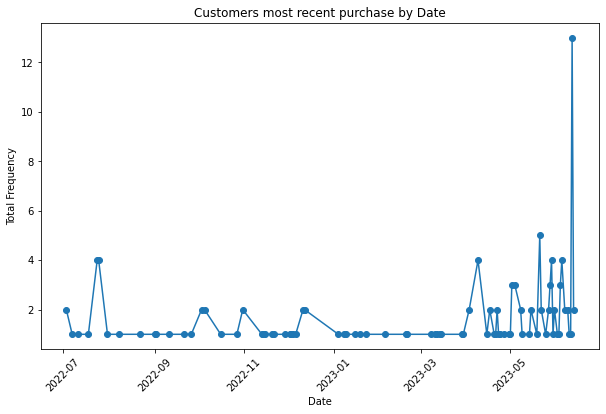

In [119]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [120]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,jasma kapadia,jasmak999@yahoo.com,2022-07-01
1,mrs.ruchi wahi,wahiruchi80@gmail.com,2022-07-01
2,parul kumar,2014parulkumar@gmail.com,2022-07-01
3,meher mirza,mehermirza123@gmail.com,2022-07-01
4,meenal srinivasan,meenal.srinivasan@gmail.com,2022-07-01
...,...,...,...
135,harsha bangari,harsha.bangari@yahoo.com,2023-06-05
136,aarthi ramakrishnan,aarthi.ramakrishnan@gmail.com,2023-06-12
137,radhika ram,radhikaram2@gmail.com,2023-06-12
138,priya godfrey,priyagodfrey@gmail.com,2023-06-12


In [121]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount

,name,item payment amount(INR)
0,michelle baptist,111402.0
1,indrani jafar,103211.0
2,jasma kapadia,98720.0
3,parul kumar,89111.0
4,yogesh thakkar,71537.0
...,...,...
135,bharti shah,235.0
136,nina dumasia,235.0
137,madhu,210.0
138,bharti kedia,147.0


In [122]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
80,parul kumar,64
57,michelle baptist,57
39,indrani jafar,50
41,jasma kapadia,47
44,kanchan samtani,36
...,...,...
59,mohyna srinivasan,1
53,malivika,1
52,madhu,1
50,lara,1


In [123]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,michelle baptist,57,111402.0,1954.0
1,indrani jafar,50,103211.0,2064.0
2,jasma kapadia,47,98720.0,2100.0
3,parul kumar,64,89111.0,1392.0
4,yogesh thakkar,11,71537.0,6503.0
...,...,...,...,...
135,bharti shah,1,235.0,235.0
136,nina dumasia,1,235.0,235.0
137,madhu,1,210.0,210.0
138,bharti kedia,1,147.0,147.0


In [124]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,anubha,"DRYFRUITS, SEEDS, NUTS",21795.0
1,anubha,FRUIT BASKET,49504.0
2,gitanjali anand,"DRYFRUITS, SEEDS, NUTS",18465.0
3,gitanjali anand,FRUIT BASKET,33440.0
4,indrani jafar,"DRYFRUITS, SEEDS, NUTS",35265.0
5,indrani jafar,FRUIT BASKET,32711.0
6,indrani jafar,HERBS & SALADS,1490.0
7,indrani jafar,"SALADS, EXOTIC VEGETABLES",30014.0
8,indrani jafar,VEGETABLES,3731.0
9,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",42895.0


In [128]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS','WEEKEND MIX FRUITS & EXOTICS','SUMMER LEAFY COOLING FOODS']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['WEEKEND MIX FRUITS & EXOTICS']+pivot_table['SUMMER LEAFY COOLING FOODS']+pivot_table['HERBS & SALADS']+pivot_table['VEGETABLES']+pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",VEGETABLES,HERBS & SALADS,WEEKEND MIX FRUITS & EXOTICS,SUMMER LEAFY COOLING FOODS,Total Amount(INR)
0,michelle baptist,46590.0,48512.0,0.0,9380.0,646.0,6274.0,0.0,111402.0
1,indrani jafar,35265.0,32711.0,1490.0,30014.0,0.0,3731.0,0.0,103211.0
2,jasma kapadia,42895.0,49075.0,0.0,6750.0,0.0,0.0,0.0,98720.0
3,parul kumar,14185.0,64046.0,0.0,6171.0,0.0,4709.0,0.0,89111.0
4,yogesh thakkar,43470.0,26532.0,0.0,1535.0,0.0,0.0,0.0,71537.0
5,anubha,21795.0,49504.0,0.0,0.0,0.0,0.0,0.0,71299.0
6,naina sharma,0.0,49566.0,0.0,4190.0,0.0,4979.0,0.0,58735.0
7,kanchan samtani,1780.0,28502.0,0.0,9077.0,0.0,15921.0,1290.0,56570.0
8,padmashree,0.0,27560.0,0.0,27280.0,0.0,0.0,0.0,54840.0
9,gitanjali anand,18465.0,33440.0,0.0,0.0,0.0,0.0,0.0,51905.0


In [84]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
#pivot_table_p['WEEKEND MIX FRUITS & EXOTICS(percentage) ']=round(pivot_table_p['WEEKEND MIX FRUITS & EXOTICS']*100/pivot_table_p['Total Amount(INR) '],2)

#pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)"
0,parul kumar,14780.0,65.83,34.17,0.00
1,indrani jafar,9864.0,43.49,0.00,56.51
2,ushma,9420.0,15.18,84.82,0.00
3,michelle baptist,9360.0,36.49,47.38,16.13
4,trupti m,8770.0,100.00,0.00,0.00
5,jasma kapadia,8555.0,88.14,11.86,0.00
6,priyanka taneja,7760.0,60.14,29.12,10.73
7,gitanjali anand,7607.0,89.48,10.52,0.00
8,neetu vinayek,7530.0,0.00,81.34,18.66
9,nidhi,7270.0,91.47,0.00,8.53


In [85]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [129]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,anubha,"[hapus mangoes 1doz, flame red grapes 1 kg, kiwi box, fiji apples 1kg, pomegranate 1kg, watermelon, imported apples 1kg, delivery, indian pear 1kg, plum 500g, mandarin small oranges 1kg, washingto..."
1,gitanjali anand,"[dried cranberries 500g, walnuts 500g, desi papaya 1pc, mandarin small oranges 1kg, indian pear 1kg, sitafal 1kg, watermelon, blueberries 2 box, flat donut peach 500g, pomegranate 1kg, delivery, n..."
2,indrani jafar,"[gavar 500g, brinjal bharta, dudhi, cucumber white 500g, bitter gourd 500g, french beans 500g, tomatoes 1kg, ladies finger 250g, cauliflower, garlic 200g, carrot ooty 500g, pumpkin 500gm pc, dhani..."
3,jasma kapadia,"[blueberries 2 box, hapus mangoes 1doz, raipur guava 1kg, kiwi box, washington apples 1kg, landga mangoes 3kg, flat donut peach 500g, delivery, imported kiwi box, indian pear 1kg, indian apples 1k..."
4,kanchan samtani,"[sweet potato 500g, green capsicum 500g, ladies finger 250g, potatoes 1kg, cucumber white 500g, dudhi, cauliflower, french beans 500g, drumsticks 250g, cabbage, tomatoes 1kg, onions 1kg, lemon 200..."
5,michelle baptist,"[pairee mangoes 1 doz, chickoo 1kg, muskmelon 1pc, regular banana 1 doz, blueberries 2 box, flame red grapes 1 kg, hapus mangoes 1doz, ladies finger 250g, bitter gourd 500g, tomatoes 1kg, gavar 50..."
6,naina sharma,"[tomatoes 1kg, sweet potato 500g, ladies finger 250g, kheera cucumber 500g, dudhi, potatoes 1kg, onions 1kg, ridge gourd 500g, french beans 500g, cauliflower, carrot ooty 500g, dhaniya bunch, gree..."
7,padmashree,"[s lettuce mix, s romaine, s summercrisp, iceberg lettuce 1 pc, s butterhead, japanese cucumber 500g, delivery, s aragula, baby spinach, hass avocados 2 pcs, italian basil, cherry tomatoes 250g, s..."
8,parul kumar,"[watermelon, muskmelon 1pc, desi papaya 1pc, elaichi banana 1dozen, delivery, button white mushroom 2packs, kheera cucumber 500g, potatoes 1kg, tomatoes 1kg, drumsticks 250g, ladies finger 250g, o..."
9,yogesh thakkar,"[pomegranate 1kg, chickoo 1kg, avocados 2 pcs, golden rasins 500g, walnuts 500g, gourmet black rasins 500g, a2 gir cow ghee 500ml, cashews 500g, honey awla 500g, malta oranges 1kg, flame red grape..."


In [130]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,michelle baptist,"[pairee mangoes 1 doz, chickoo 1kg, muskmelon 1pc, regular banana 1 doz, blueberries 2 box, flame red grapes 1 kg, hapus mangoes 1doz, ladies finger 250g, bitter gourd 500g, tomatoes 1kg, gavar 50...",111402.0
1,indrani jafar,"[gavar 500g, brinjal bharta, dudhi, cucumber white 500g, bitter gourd 500g, french beans 500g, tomatoes 1kg, ladies finger 250g, cauliflower, garlic 200g, carrot ooty 500g, pumpkin 500gm pc, dhani...",103211.0
2,jasma kapadia,"[blueberries 2 box, hapus mangoes 1doz, raipur guava 1kg, kiwi box, washington apples 1kg, landga mangoes 3kg, flat donut peach 500g, delivery, imported kiwi box, indian pear 1kg, indian apples 1k...",98720.0
3,parul kumar,"[watermelon, muskmelon 1pc, desi papaya 1pc, elaichi banana 1dozen, delivery, button white mushroom 2packs, kheera cucumber 500g, potatoes 1kg, tomatoes 1kg, drumsticks 250g, ladies finger 250g, o...",89111.0
4,yogesh thakkar,"[pomegranate 1kg, chickoo 1kg, avocados 2 pcs, golden rasins 500g, walnuts 500g, gourmet black rasins 500g, a2 gir cow ghee 500ml, cashews 500g, honey awla 500g, malta oranges 1kg, flame red grape...",71537.0
5,anubha,"[hapus mangoes 1doz, flame red grapes 1 kg, kiwi box, fiji apples 1kg, pomegranate 1kg, watermelon, imported apples 1kg, delivery, indian pear 1kg, plum 500g, mandarin small oranges 1kg, washingto...",71299.0
6,naina sharma,"[tomatoes 1kg, sweet potato 500g, ladies finger 250g, kheera cucumber 500g, dudhi, potatoes 1kg, onions 1kg, ridge gourd 500g, french beans 500g, cauliflower, carrot ooty 500g, dhaniya bunch, gree...",58735.0
7,kanchan samtani,"[sweet potato 500g, green capsicum 500g, ladies finger 250g, potatoes 1kg, cucumber white 500g, dudhi, cauliflower, french beans 500g, drumsticks 250g, cabbage, tomatoes 1kg, onions 1kg, lemon 200...",56570.0
8,padmashree,"[s lettuce mix, s romaine, s summercrisp, iceberg lettuce 1 pc, s butterhead, japanese cucumber 500g, delivery, s aragula, baby spinach, hass avocados 2 pcs, italian basil, cherry tomatoes 250g, s...",54840.0
9,gitanjali anand,"[dried cranberries 500g, walnuts 500g, desi papaya 1pc, mandarin small oranges 1kg, indian pear 1kg, sitafal 1kg, watermelon, blueberries 2 box, flat donut peach 500g, pomegranate 1kg, delivery, n...",51905.0


In [133]:
detail_item=top_customer_detail[top_customer_detail['name']=='michelle baptist'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium almonds 500g,13500.0,15.0
1,walnuts 500g,9240.0,8.0
2,blueberries 2 box,8945.0,15.0
3,cashews 500g,5740.0,7.0
4,avocados 2 pcs,5000.0,8.0
...,...,...,...
93,sweet potato 500g,35.0,1.0
94,english cucumber 500g,32.0,1.0
95,red carrot 500g,30.0,1.0
96,methi 200g,28.0,1.0


In [131]:
detail_item=top_customer_detail[top_customer_detail['name']=='parul kumar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,desi papaya 1pc,7100.0,71.0
1,hass avocados 2 pcs,4755.0,8.0
2,avocados 2 pcs,4585.0,7.0
3,pomegranate 1kg,4320.0,13.0
4,beauty pear 1kg,4200.0,14.0
...,...,...,...
75,pumpkin 500gm pc,39.0,1.0
76,raw banana 500 gm,35.0,1.0
77,palak 200g,28.0,1.0
78,mint bunch,25.0,1.0


In [132]:
detail_item=top_customer_detail[top_customer_detail['name']=='indrani jafar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,avocados 2 pcs,7315.0,11.0
1,salted pista 500g,5800.0,4.0
2,blueberries 2 box,5490.0,9.0
3,japanese cucumber 500g,4840.0,57.0
4,pine nuts 100g,4830.0,7.0
...,...,...,...
97,red carrot 500g,30.0,1.0
98,palak 200g,28.0,1.0
99,methi 200g,28.0,1.0
100,green chilli 200g,25.0,1.0


In [134]:
detail_item=top_customer_detail[top_customer_detail['name']=='jasma kapadia'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,15015.0,13.0
1,blueberries 2 box,10780.0,18.0
2,salted pista 500g,7250.0,5.0
3,premium almonds 500g,6300.0,7.0
4,jumbo anjeer 500g,6075.0,6.0
5,avocados 2 pcs,3250.0,5.0
6,kiwi box,3000.0,15.0
7,new zealand queen apples 1kg,2800.0,7.0
8,imported kiwi box,2745.0,13.0
9,new zealand red apples 1kg,2340.0,6.0


### visualization

In [ ]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [ ]:
combined_data_payment_completed['date']

In [ ]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

In [ ]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [ ]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [ ]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

Dryfruits sales this month

### Fruits

In [ ]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

### Vegetables

In [ ]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

### Exotic vegetables

In [ ]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
combined_data_payment_completed['name'].unique()

#### Indrani's data 

In [ ]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

In [ ]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

# END